In [44]:
import rosbag
import random


cloud_frames=[] #?
rmsg=None
bag = rosbag.Bag('pcl_and_disp.bag')
for topic, msg, t in bag.read_messages(topics=['/points2']): #, '/right/image_raw']): 
    #cloud_frames.append(pointcloud2_to_array(msg))
    if random.randint(5,5)==5:
        rmsg=msg
        print("click")
    break
bag.close()


click


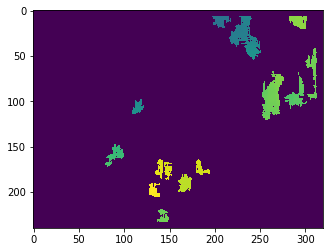

In [46]:
import rosbag
import random


from cv_bridge import CvBridge, CvBridgeError

bridge=CvBridge()
a=[]
bag = rosbag.Bag('pcl_and_disp.bag')
for topic, msg, t in bag.read_messages(topics=['/disparity']):
    a.append(bridge.imgmsg_to_cv2(msg.image, "32FC1"))
    
    #, '/right/image_raw']): 
    #cloud_frames.append(pointcloud2_to_array(msg))
    #rmsg=msg
    #break
bag.close()
plt.imshow(a[0])

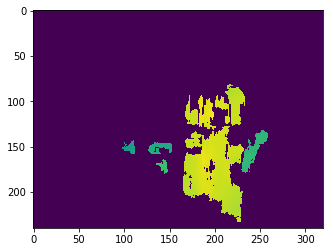

In [55]:
plt.imshow(a[550])

In [29]:
import sensor_msgs.point_cloud2 as p2
import time
t0=time.time()
ps=[]
for point in p2.read_points(rmsg, skip_nans=True):
            pt_x = point[0]
            pt_y = point[1]
            pt_z = point[2]
            ps.append([pt_x,pt_y,pt_z])
print(time.time()-t0)

AssertionError: cloud is not a sensor_msgs.msg.PointCloud2

In [27]:
ps

[[-0.017266079783439636, -0.1769540011882782, 1.0773799419403076],
 [-0.015460394322872162, -0.1751483529806137, 1.066386342048645],
 [-0.012498986907303333, -0.17942026257514954, 1.0923957824707031],
 [-0.010607972741127014, -0.1757461279630661, 1.0700258016586304],
 [-0.008822359144687653, -0.17279736697673798, 1.0520724058151245],
 [-0.007142822723835707, -0.17107513546943665, 1.0415866374969482],
 [-0.005478414706885815, -0.16883152723312378, 1.0279264450073242],
 [-0.0038696208503097296, -0.16718706488609314, 1.0179141759872437],
 [-0.002299258019775152, -0.16610842943191528, 1.0113470554351807],
 [0.0007480989443138242, -0.15699271857738495, 0.9558462500572205],
 [0.002182077383622527, -0.1551012396812439, 0.9443300366401672],
 [0.0035607186146080494, -0.15234796702861786, 0.9275667667388916],
 [0.004891267977654934, -0.14969073235988617, 0.9113882780075073],
 [0.006211693398654461, -0.14797015488147736, 0.9009125828742981],
 [0.00739703793078661, -0.14423981308937073, 0.87820047

[[ 0.01444184 -0.109507    0.86169702]
 [ 0.25664479 -0.37511222  2.75267201]
 [ 0.02554412 -0.00845282  0.46999721]
 [-0.15248404 -0.12410507  1.06995735]
 [-0.1349891  -0.0399004   0.81866734]
 [-0.01022569 -0.14941854  1.05646461]]


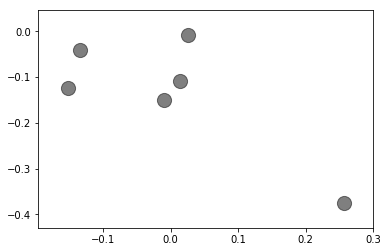

In [26]:
from matplotlib import pyplot as plt
import cv2
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(ps)

centers = kmeans.cluster_centers_
print(centers)
#plt.scatter(x[:,1],x[:,0])
plt.scatter(centers[:, 0], centers[:, 1]
            , c='black', s=200, alpha=0.5)
plt.show()
#plt.imshow(kmeans.transform(gray))